In [14]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%config InlineBackend.figure_format = 'svg'

In [15]:
import pickle
f=open("trainX.pickle","rb")
images=pickle.load(f)

In [16]:
f=open("trainY.pickle","rb")
labels = pickle.load(f)

In [17]:
from sklearn import model_selection

In [18]:
img_rows, img_cols=28,28

#the data shuffled and split between train and test sets
X_train, X_test, y_train, y_test = model_selection.train_test_split(images, labels)

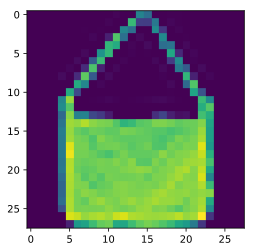

In [19]:
# lets see what the images look like

image = X_train[50, :].reshape((28, 28))

plt.imshow(image)
plt.show()

In [20]:
im_rows = 28
im_cols = 28
batch_size = 512
im_shape = (im_rows, im_cols, 1)    # 28*28*1  grayscale image size

#reshaping rows [0]
X_train = X_train.reshape(X_train.shape[0], *im_shape)
X_test = X_test.reshape(X_test.shape[0], *im_shape)


print('x_train shape: {}'.format(X_train.shape))
print('x_test shape: {}'.format(X_test.shape))


x_train shape: (45000, 28, 28, 1)
x_test shape: (15000, 28, 28, 1)


In [ ]:
X_train = X_train.astype('float32')
X_test= X_test.astype('float32')
X_train/=255
X_test/=255
print(('X_train_ shape:', X_train.shape))
print((X_train.shape[0], 'train samples'))
print((X_test.shape[0], 'test samples'))

#pixels 0-255 .. so 0-1 p normalize    therfore /255
y_train  = keras.utils.to_categorical(y_train,10)
y_test= keras.utils.to_categorical(y_test,10)

In [27]:
# our 3 models 

name = '1_Layer'
cnn_model_1 = Sequential([
    Conv2D(32, kernel_size=3, activation='relu', input_shape=im_shape, name='Conv2D-1'),
    MaxPooling2D(pool_size=2, name='MaxPool'),
    Dropout(0.2, name='Dropout'),
    Flatten(name='flatten'),
    Dense(32, activation='relu', name='Dense'),
    Dense(10, activation='softmax', name='Output')
], name=name)

name = '2_Layer'
cnn_model_2 = Sequential([
    Conv2D(32, kernel_size=3, activation='relu', input_shape=im_shape, name='Conv2D-1'),
    MaxPooling2D(pool_size=2, name='MaxPool'),
    Dropout(0.2, name='Dropout-1'),
    Conv2D(64, kernel_size=3, activation='relu', name='Conv2D-2'),
    Dropout(0.25, name='Dropout-2'),
    Flatten(name='flatten'),
    Dense(64, activation='relu', name='Dense'),
    Dense(10, activation='softmax', name='Output')
], name=name)

cnn_models = [cnn_model_1, cnn_model_2]

In [28]:
for model in cnn_models:
    model.summary()
    
#increased number of paramter with each layer

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv2D-1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
MaxPool (MaxPooling2D)       (None, 13, 13, 32)        0         
_________________________________________________________________
Dropout (Dropout)            (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
Dense (Dense)                (None, 32)                173088    
_________________________________________________________________
Output (Dense)               (None, 10)                330       
Total params: 173,738
Trainable params: 173,738
Non-trainable params: 0
_________________________________________________________________
____

In [29]:
# train the models and save results to a dict

history_dict = {}

for model in cnn_models:
    model.compile(
        loss='sparse_categorical_crossentropy',
        optimizer=Adam(),
        metrics=['accuracy']
    )
    
    history = model.fit(
        X_train, y_train,
        batch_size=batch_size,
        epochs=10, verbose=1,
        validation_data=(X_test, y_test)
    )
    
    history_dict[model.name] = history

Train on 45000 samples, validate on 15000 samples
Epoch 1/10
45000/45000 [==============================] - 30s 677us/step - loss: 10.4187 - acc: 0.3486 - val_loss: 10.0034 - val_acc: 0.3762
Epoch 2/10
45000/45000 [==============================] - 29s 649us/step - loss: 8.2728 - acc: 0.4794 - val_loss: 4.5800 - val_acc: 0.6973
Epoch 3/10
45000/45000 [==============================] - 29s 645us/step - loss: 3.9463 - acc: 0.7378 - val_loss: 3.6212 - val_acc: 0.7533
Epoch 4/10
45000/45000 [==============================] - 28s 629us/step - loss: 1.8258 - acc: 0.7692 - val_loss: 0.4602 - val_acc: 0.8509
Epoch 5/10
45000/45000 [==============================] - 28s 615us/step - loss: 0.4144 - acc: 0.8573 - val_loss: 0.3701 - val_acc: 0.8701
Epoch 6/10
45000/45000 [==============================] - 29s 641us/step - loss: 0.3430 - acc: 0.8784 - val_loss: 0.3391 - val_acc: 0.8815
Epoch 7/10
45000/45000 [==============================] - 29s 645us/step - loss: 0.3015 - acc: 0.8913 - val_loss: 

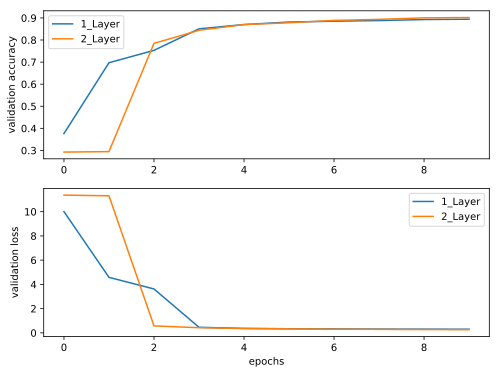

In [32]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(8, 6))

for history in history_dict:
    val_acc = history_dict[history].history['val_acc']
    val_loss = history_dict[history].history['val_loss']
    ax1.plot(val_acc, label=history)
    ax2.plot(val_loss, label=history)
    
ax1.set_ylabel('validation accuracy')
ax2.set_ylabel('validation loss')
ax2.set_xlabel('epochs')
ax1.legend()
ax2.legend()
plt.show()